In [397]:
import pandas as pd
import glob
import openpyxl  # Ensure openpyxl is installed

# Path to the folder containing Excel files
folder_path = "/Users/ls/TTC delay/"  # Ensure this path is correct and exists

# Get a list of all Excel files in the folder
file_list = glob.glob(folder_path + "*.xlsx")

# Check if there are files to process
if not file_list:
    print("No Excel files found in the folder!")
else:
    # Read and combine all files into a single DataFrame
    df = pd.concat([pd.read_excel(file, engine="openpyxl") for file in file_list], ignore_index=True)

    # Display first few rows
    print(df.head())



        Date   Time     Day             Station   Code  Min Delay  Min Gap  \
0 2024-01-01  02:00  Monday    SHEPPARD STATION    MUI          0        0   
1 2024-01-01  02:00  Monday      DUNDAS STATION   MUIS          0        0   
2 2024-01-01  02:08  Monday      DUNDAS STATION  MUPAA          4       10   
3 2024-01-01  02:13  Monday  KENNEDY BD STATION  PUTDN         10       16   
4 2024-01-01  02:22  Monday       BLOOR STATION  MUPAA          4       10   

  Bound Line  Vehicle  
0     N   YU     5491  
1     N   YU        0  
2     N   YU     6051  
3     E   BD     5284  
4     N   YU     5986  


In [398]:
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
69306,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
69307,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191
69308,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171
69309,2023-12-31,15:15,Sunday,BAYVIEW STATION,TUOPO,7,14,E,SHP,6141


In [399]:
print(df.info())  # Shows data types, non-null counts, and memory usage



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69311 entries, 0 to 69310
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       69311 non-null  datetime64[ns]
 1   Time       69311 non-null  object        
 2   Day        69311 non-null  object        
 3   Station    69311 non-null  object        
 4   Code       69311 non-null  object        
 5   Min Delay  69311 non-null  int64         
 6   Min Gap    69311 non-null  int64         
 7   Bound      45719 non-null  object        
 8   Line       69180 non-null  object        
 9   Vehicle    69311 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.3+ MB
None


In [400]:
print(df.describe())  # Summary stats like mean, min, max, std, etc.


                                Date     Min Delay       Min Gap       Vehicle
count                          69311  69311.000000  69311.000000  69311.000000
mean   2023-08-05 14:51:33.431056896      3.110026      4.547705   3259.123718
min              2022-01-01 00:00:00      0.000000      0.000000      0.000000
25%              2022-11-16 00:00:00      0.000000      0.000000      0.000000
50%              2023-08-25 00:00:00      0.000000      0.000000   5120.000000
75%              2024-05-04 00:00:00      4.000000      8.000000   5616.000000
max              2024-12-31 00:00:00    716.000000    719.000000   9546.000000
std                              NaN     10.439003     11.258063   2725.745512


In [401]:
import pandas as pd

# Drop rows with any missing values
df_cleaned = df.dropna()

# Display number of rows before and after cleaning
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])


Rows before cleaning: 69311
Rows after cleaning: 45703


In [402]:
print(df_cleaned.info())  # Shows data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 45703 entries, 0 to 69309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       45703 non-null  datetime64[ns]
 1   Time       45703 non-null  object        
 2   Day        45703 non-null  object        
 3   Station    45703 non-null  object        
 4   Code       45703 non-null  object        
 5   Min Delay  45703 non-null  int64         
 6   Min Gap    45703 non-null  int64         
 7   Bound      45703 non-null  object        
 8   Line       45703 non-null  object        
 9   Vehicle    45703 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.8+ MB
None


In [403]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
69305,2023-12-31,01:53,Sunday,OSGOODE STATION,MUPAA,0,0,S,YU,6051
69306,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
69307,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191
69308,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171


In [404]:
# Convert the "Vehicle" column to String type
df_cleaned["Vehicle"] = df_cleaned["Vehicle"].astype(str)

# Verify the change
print(df_cleaned["Vehicle"].dtype)  # Should print 'object' (string in pandas)


object


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/825579373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Vehicle"] = df_cleaned["Vehicle"].astype(str)


In [405]:
# Create the 'Delayed' variable based on 'Min Delay'
df_cleaned["Delayed"] = (df_cleaned["Min Delay"] > 0).astype(int)

# Display the first few rows to verify
print(df_cleaned[["Min Delay", "Delayed"]].head())


   Min Delay  Delayed
0          0        0
1          0        0
2          4        1
3         10        1
4          4        1


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/2899791942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Delayed"] = (df_cleaned["Min Delay"] > 0).astype(int)


In [406]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delayed
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491,0
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051,1
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,1
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,1
...,...,...,...,...,...,...,...,...,...,...,...
69305,2023-12-31,01:53,Sunday,OSGOODE STATION,MUPAA,0,0,S,YU,6051,0
69306,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196,1
69307,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191,0
69308,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171,1


In [407]:
import pandas as pd

# Count occurrences where Min Delay = 0 and Min Delay > 0
min_delay_counts = {
    "Min Delay = 0": (df_cleaned["Min Delay"] == 0).sum(),
    "Min Delay > 0": (df_cleaned["Min Delay"] > 0).sum()
}

# Convert to DataFrame for better readability
min_delay_counts_df = pd.DataFrame.from_dict(min_delay_counts, orient="index", columns=["Count"])

# Display the counts
print(min_delay_counts_df)


               Count
Min Delay = 0  19429
Min Delay > 0  26274


In [408]:
# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()

# Display summary statistics
print(summary_stats)

                                Date     Min Delay       Min Gap       Delayed
count                          45703  45703.000000  45703.000000  45703.000000
mean   2023-07-20 13:56:30.000656384      4.647157      6.800845      0.574886
min              2022-01-01 00:00:00      0.000000      0.000000      0.000000
25%              2022-10-14 00:00:00      0.000000      0.000000      0.000000
50%              2023-08-01 00:00:00      3.000000      6.000000      1.000000
75%              2024-04-25 00:00:00      5.000000     10.000000      1.000000
max              2024-12-31 00:00:00    716.000000    719.000000      1.000000
std                              NaN     12.294780     13.016016      0.494366


In [409]:
# Count the number of delays per station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations with most delays

In [410]:
station_counts

Station
BLOOR STATION         1937
FINCH STATION         1703
EGLINTON STATION      1450
KIPLING STATION       1359
KENNEDY BD STATION    1297
Name: count, dtype: int64

/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/949741949.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_counts.values, y=station_counts.index, palette="viridis")


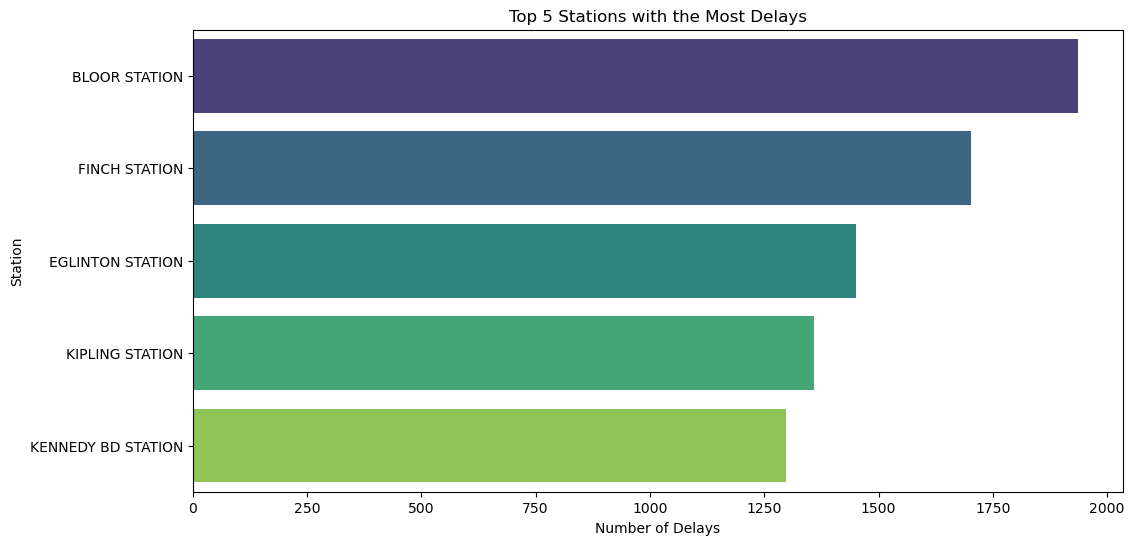

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations

# Plot bar chart for Station distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.values, y=station_counts.index, palette="viridis")

plt.xlabel("Number of Delays")
plt.ylabel("Station")
plt.title("Top 5 Stations with the Most Delays")
plt.show()


In [412]:
# Define the list of five stations to keep
selected_stations = ["BLOOR STATION", "KIPLING STATION", "FINCH STATION", "EGLINTON STATION", "KENNEDY BD STATION"]  # Replace with actual station names

# Filter the dataset to keep only these stations
df_cleaned = df_cleaned[df_cleaned["Station"].isin(selected_stations)]

# Display the number of remaining records
print("Rows after keeping only selected stations:", df_cleaned.shape[0])

Rows after keeping only selected stations: 7746


In [413]:
import pandas as pd

# Generate statistics for the 'Bound' variable
bound_stats = df_cleaned["Bound"].describe(include="all")

# Display the statistics
print(bound_stats)


count     7746
unique       5
top          S
freq      3099
Name: Bound, dtype: object


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/1116272062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bound_counts.index, y=bound_counts.values, palette="viridis")


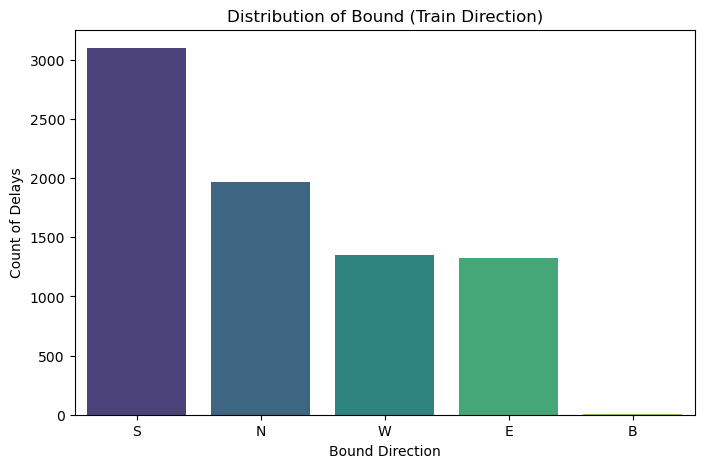

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Plot bar chart for Bound distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=bound_counts.index, y=bound_counts.values, palette="viridis")

plt.xlabel("Bound Direction")
plt.ylabel("Count of Delays")
plt.title("Distribution of Bound (Train Direction)")
plt.show()


In [415]:
# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Display the counts
print(bound_counts)




Bound
S    3099
N    1971
W    1351
E    1323
B       2
Name: count, dtype: int64


In [416]:
# Remove rows where Bound = B
df_cleaned = df_cleaned[df_cleaned["Bound"] != "B"]

In [417]:
import pandas as pd

# Define seasons based on the month
def categorize_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Convert "Date" column to datetime format (if not already)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Apply the function to categorize each date into a season
df_cleaned["Season"] = df_cleaned["Date"].apply(categorize_season)

# Remove the "Date" column after categorizing into seasons
df_cleaned = df_cleaned.drop(columns=["Date"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())



     Time     Day             Station   Code  Min Delay  Min Gap Bound Line  \
3   02:13  Monday  KENNEDY BD STATION  PUTDN         10       16     E   BD   
4   02:22  Monday       BLOOR STATION  MUPAA          4       10     N   YU   
6   02:25  Monday       BLOOR STATION  MUIRS          0        0     S   YU   
8   02:28  Monday       FINCH STATION  MUIRS          0        0     S   YU   
10  02:36  Monday       FINCH STATION    MUI         24       30     S   YU   

   Vehicle  Delayed  Season  
3     5284        1  Winter  
4     5986        1  Winter  
6        0        0  Winter  
8     5561        0  Winter  
10    5931        1  Winter  


In [418]:
# Define time categories based on the hour of the day
def categorize_time(time):
    hour = int(time.split(":")[0])  # Extract hour from time string
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize each time into a time period
df_cleaned["Time Period"] = df_cleaned["Time"].apply(categorize_time)

# Remove the original "Time" column

df_cleaned = df_cleaned.drop(columns=["Time"], errors="ignore")

# Display the first few rows to verify

print(df_cleaned.head())


       Day             Station   Code  Min Delay  Min Gap Bound Line Vehicle  \
3   Monday  KENNEDY BD STATION  PUTDN         10       16     E   BD    5284   
4   Monday       BLOOR STATION  MUPAA          4       10     N   YU    5986   
6   Monday       BLOOR STATION  MUIRS          0        0     S   YU       0   
8   Monday       FINCH STATION  MUIRS          0        0     S   YU    5561   
10  Monday       FINCH STATION    MUI         24       30     S   YU    5931   

    Delayed  Season Time Period  
3         1  Winter       Night  
4         1  Winter       Night  
6         0  Winter       Night  
8         0  Winter       Night  
10        1  Winter       Night  


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/2959335340.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


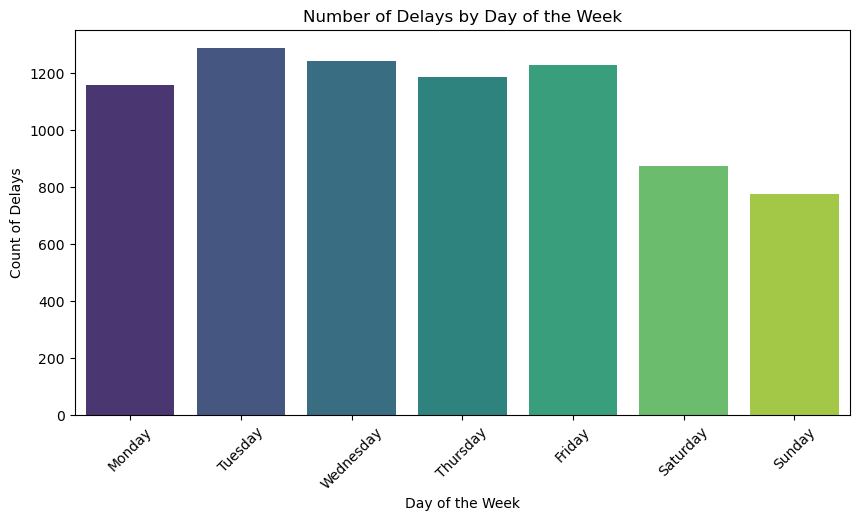

In [419]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count occurrences of each day and reorder based on the defined order
day_counts = df_cleaned["Day"].value_counts().reindex(day_order)

# Plot bar chart for Day distribution in correct order
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")

plt.xlabel("Day of the Week")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Day of the Week")
plt.xticks(rotation=45)
plt.show()


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/2919783553.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette="viridis")


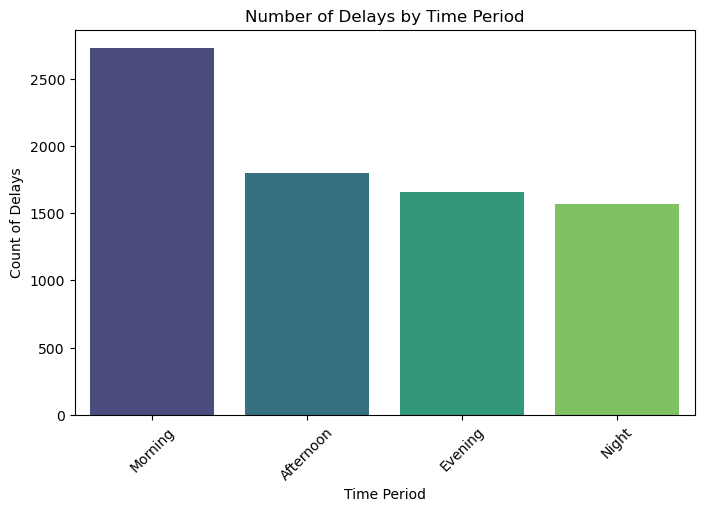

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for time periods
time_period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Count occurrences of each time period and reorder them
time_period_counts = df_cleaned["Time Period"].value_counts().reindex(time_period_order)

# Plot bar chart for Time Period distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette="viridis")

plt.xlabel("Time Period")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Time Period")
plt.xticks(rotation=45)
plt.show()


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/2896537177.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")


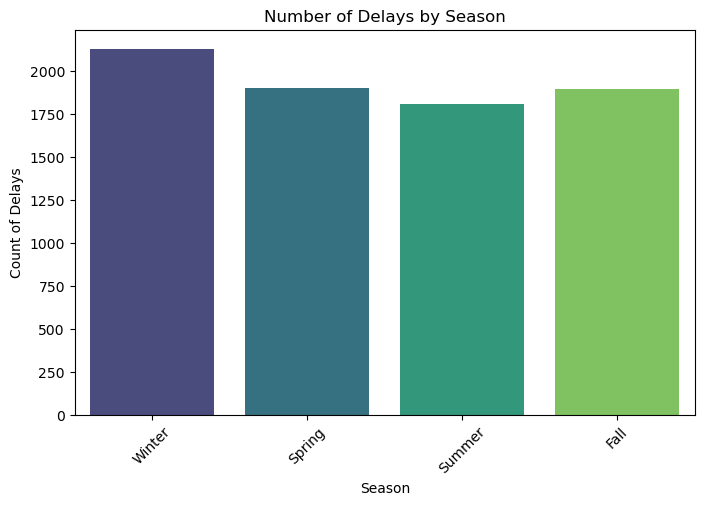

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for seasons
season_order = ["Winter", "Spring", "Summer", "Fall"]

# Count occurrences of each season and reorder them
season_counts = df_cleaned["Season"].value_counts().reindex(season_order)

# Plot bar chart for Season distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")

plt.xlabel("Season")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Season")
plt.xticks(rotation=45)
plt.show()


In [422]:
df_cleaned


,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delayed,Season,Time Period
3,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,1,Winter,Night
4,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,1,Winter,Night
6,Monday,BLOOR STATION,MUIRS,0,0,S,YU,0,0,Winter,Night
8,Monday,FINCH STATION,MUIRS,0,0,S,YU,5561,0,Winter,Night
10,Monday,FINCH STATION,MUI,24,30,S,YU,5931,1,Winter,Night
...,...,...,...,...,...,...,...,...,...,...,...
69244,Sunday,FINCH STATION,TUNOA,6,12,S,YU,0,1,Winter,Morning
69250,Sunday,EGLINTON STATION,TUNOA,4,8,N,YU,0,1,Winter,Morning
69262,Sunday,EGLINTON STATION,MUPAA,4,8,S,YU,5496,1,Winter,Afternoon
69269,Sunday,KENNEDY BD STATION,SUUT,0,0,E,BD,0,0,Winter,Evening


In [423]:
import pandas as pd

# Define a dictionary mapping each Code to its corresponding category
issue_categories = {
    "Electrical and Mechanical Systems (Train Equipment & Power)": 
        ["EUAC", "ERAC", "EUAL", "EUATC", "EUCH", "EUHV", "ERHV", "EULT", "ERLT", "EULV", 
         "ERLV", "EUPI", "ERPR", "EUSC", "MUSC", "EUTM", "EUTL", "ERTL", "PRSP", "PUSTP", 
         "PUSCA", "PUSI", "PUSIO", "PUSIS", "PUSNT", "TUDOE", "TRDOE"],

    "Train Operations & Control Systems": 
        ["ERTC", "PRSA", "PUSAC", "PRSL", "PRSO", "PUATC", "PRSW", "PRTST", "PUSTS", "PUCBI", 
         "PUCSS", "PUSLC", "PUTSC", "PUCSS", "PUDCS", "PUOPO", "PUSBE", "PUSSW", "PUSTC", 
         "PUSWZ", "PUSZC", "TUCC", "TRTC", "TUSET", "TRSET"],

    "Structural & Track-Related Issues": 
        ["PRW", "PUTR", "PUTTP", "PUTCD", "PUTD", "PUTIJ", "PUTNT", "PUTO", "PUTOE", "TUOPO", 
         "PUTS", "PUTSM", "PUTTC", "PUTWZ", "PUSO"],

    "Human & Operational Factors": 
        ["MUESA", "TUNOA", "TRNOA", "TUKEY", "TUML", "TUMVS", "TUNIP", "TRNIP", "TUO", "TRO", 
         "TUOS", "TUS", "TUSC", "TUSUP", "MUWR", "MUIE", "MRIE", "SUAE", "SRAE", "SUCOL", 
         "SRCOL", "SUEAS", "SREAS", "PUSEA", "SUO", "SRO"],

    "Miscellaneous & Passenger-Related Incidents": 
        ["EUDO", "ERDO", "EUOE", "MUCL", "MRCL", "MUEC", "MREC", "MUGD", "MUODC", "MUPAA", 
         "MRPAA", "PUMEL", "PREL", "PRO", "PRS", "PUMST", "PRST", "PUMO", "MUTO", "MUO", "MRO"]
}

# Create a function to categorize issues based on their Code
def categorize_issue(code):
    for category, codes in issue_categories.items():
        if code in codes:
            return category
    return "Other"  # Default category if not found

# Apply the categorization to create a new column "Issue Category"
df_cleaned["Issue Category"] = df_cleaned["Code"].apply(categorize_issue)

# Display the first few rows to verify the categorization
print(df_cleaned[["Code", "Issue Category"]].head())


     Code                               Issue Category
3   PUTDN                                        Other
4   MUPAA  Miscellaneous & Passenger-Related Incidents
6   MUIRS                                        Other
8   MUIRS                                        Other
10    MUI                                        Other


In [424]:
import pandas as pd

# Count occurrences of each Issue Category
issue_category_counts = df_cleaned["Issue Category"].value_counts()

# Convert to DataFrame for better readability
issue_category_counts_df = issue_category_counts.to_frame().reset_index()
issue_category_counts_df.columns = ["Issue Category", "Count"]

# Display the counts
print(issue_category_counts_df)


                                      Issue Category  Count
0                                              Other   3879
1                        Human & Operational Factors   1683
2        Miscellaneous & Passenger-Related Incidents   1097
3  Electrical and Mechanical Systems (Train Equip...    544
4                 Train Operations & Control Systems    396
5                  Structural & Track-Related Issues    145


In [425]:
import pandas as pd

# Remove specified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=["Delay Band", "Code"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())


       Day             Station  Min Delay  Min Gap Bound Line Vehicle  \
3   Monday  KENNEDY BD STATION         10       16     E   BD    5284   
4   Monday       BLOOR STATION          4       10     N   YU    5986   
6   Monday       BLOOR STATION          0        0     S   YU       0   
8   Monday       FINCH STATION          0        0     S   YU    5561   
10  Monday       FINCH STATION         24       30     S   YU    5931   

    Delayed  Season Time Period                               Issue Category  
3         1  Winter       Night                                        Other  
4         1  Winter       Night  Miscellaneous & Passenger-Related Incidents  
6         0  Winter       Night                                        Other  
8         0  Winter       Night                                        Other  
10        1  Winter       Night                                        Other  


In [426]:
# Reorder the columns in df_cleaned
df_cleaned = df_cleaned[[
    "Delayed", "Season", "Day", "Time Period", 
    "Station", "Bound", "Line", "Min Gap", "Issue Category"
]]

# Display the first few rows to verify the order
print(df_cleaned.head())


    Delayed  Season     Day Time Period             Station Bound Line  \
3         1  Winter  Monday       Night  KENNEDY BD STATION     E   BD   
4         1  Winter  Monday       Night       BLOOR STATION     N   YU   
6         0  Winter  Monday       Night       BLOOR STATION     S   YU   
8         0  Winter  Monday       Night       FINCH STATION     S   YU   
10        1  Winter  Monday       Night       FINCH STATION     S   YU   

    Min Gap                               Issue Category  
3        16                                        Other  
4        10  Miscellaneous & Passenger-Related Incidents  
6         0                                        Other  
8         0                                        Other  
10       30                                        Other  


In [427]:
# Count occurrences of delays by season
season_counts = df_cleaned["Season"].value_counts()

season_counts

Season
Winter    2132
Spring    1904
Fall      1900
Summer    1808
Name: count, dtype: int64

In [428]:
 # Save df_cleaned to a CSV file
#df_cleaned.to_csv("df_cleaned.csv", index=False)

#print("Dataset saved as 'df_cleaned.csv'")


In [429]:
df_cleaned

,Delayed,Season,Day,Time Period,Station,Bound,Line,Min Gap,Issue Category
3,1,Winter,Monday,Night,KENNEDY BD STATION,E,BD,16,Other
4,1,Winter,Monday,Night,BLOOR STATION,N,YU,10,Miscellaneous & Passenger-Related Incidents
6,0,Winter,Monday,Night,BLOOR STATION,S,YU,0,Other
8,0,Winter,Monday,Night,FINCH STATION,S,YU,0,Other
10,1,Winter,Monday,Night,FINCH STATION,S,YU,30,Other
...,...,...,...,...,...,...,...,...,...
69244,1,Winter,Sunday,Morning,FINCH STATION,S,YU,12,Human & Operational Factors
69250,1,Winter,Sunday,Morning,EGLINTON STATION,N,YU,8,Human & Operational Factors
69262,1,Winter,Sunday,Afternoon,EGLINTON STATION,S,YU,8,Miscellaneous & Passenger-Related Incidents
69269,0,Winter,Sunday,Evening,KENNEDY BD STATION,E,BD,0,Other


In [430]:
from sklearn.preprocessing import LabelEncoder

# Ensure "Season" column exists, if not, create it from "Date"
if "Season" not in df_cleaned.columns:
    if "Date" in df_cleaned.columns:
        df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
        
        # Define function to categorize season
        def categorize_season(date):
            month = date.month
            if month in [12, 1, 2]:
                return "Winter"
            elif month in [3, 4, 5]:
                return "Spring"
            elif month in [6, 7, 8]:
                return "Summer"
            else:
                return "Fall"
        
        # Apply function to create "Season" column
        df_cleaned["Season"] = df_cleaned["Date"].apply(categorize_season)

# Encode "Season" as numerical values
le_season = LabelEncoder()
df_cleaned["Season"] = le_season.fit_transform(df_cleaned["Season"])

# Count occurrences of delays by season
season_counts = df_cleaned["Season"].value_counts()

# Encode "Day" as numerical values
le_season = LabelEncoder()
df_cleaned["Day"] = le_season.fit_transform(df_cleaned["Day"])

# Encode "Station" as numerical values
le_season = LabelEncoder()
df_cleaned["Station"] = le_season.fit_transform(df_cleaned["Station"])

# Encode "Bound" as numerical values
le_season = LabelEncoder()
df_cleaned["Bound"] = le_season.fit_transform(df_cleaned["Bound"])

# Encode "Station" as numerical values
le_season = LabelEncoder()
df_cleaned["Line"] = le_season.fit_transform(df_cleaned["Line"])

# Encode "Issue Category" as numerical values
le_season = LabelEncoder()
df_cleaned["Issue Category"] = le_season.fit_transform(df_cleaned["Issue Category"])

# Encode "Time Period" as numerical values
le_season = LabelEncoder()
df_cleaned["Time Period"] = le_season.fit_transform(df_cleaned["Time Period"])

# in the models, we exclude the Min Gap, this variable is highly correlated with the target.

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Delayed","Min Gap"])  # All variables except "Delayed"
y = df_cleaned["Delayed"]  # Target variable (1 = delayed, 0 = not delayed)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display model performance metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Model Performance:
Accuracy: 0.65
Precision: 0.66
Recall: 0.89

Confusion Matrix:
[[147 438]
 [110 854]]


In [432]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)


# Display model performance metrics
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)
print("\nConfusion Matrix:")
print(conf_matrix)


Decision Tree Model Performance:
Accuracy: 0.67
Precision: 0.77
Recall: 0.68

Confusion Matrix:
[[387 198]
 [307 657]]


In [433]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)


# Display model performance metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Model Performance:
Accuracy: 0.68
Precision: 0.75
Recall: 0.74

Confusion Matrix:
[[348 237]
 [251 713]]


In [434]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)


# Display model performance metrics
print("Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix:")
print(conf_matrix)


Gradient Boosting Model Performance:
Accuracy: 0.72
Precision: 0.76
Recall: 0.80

Confusion Matrix:
[[341 244]
 [195 769]]


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_40360/633919617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_gb["Importance"], y=feature_importance_gb["Feature"], palette="viridis")


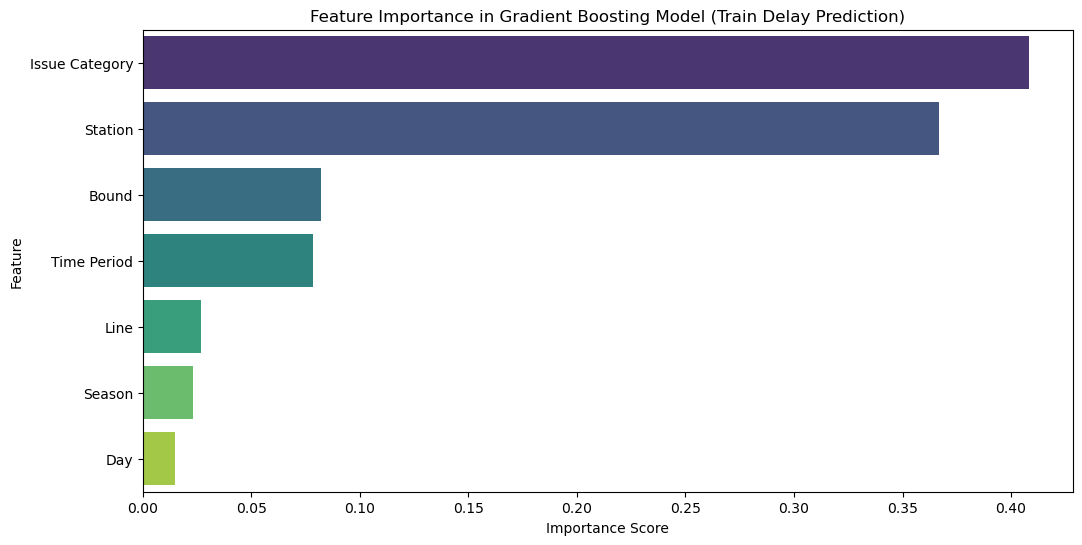

In [435]:
# Get feature importance from the trained Gradient Boosting model
feature_importance_gb = pd.DataFrame({"Feature": X.columns, "Importance": gb_model.feature_importances_})

# Sort features by importance
feature_importance_gb = feature_importance_gb.sort_values(by="Importance", ascending=False)

# Plot feature importance using Seaborn for a clean visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_gb["Importance"], y=feature_importance_gb["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting Model (Train Delay Prediction)")
plt.show()

In [436]:


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Neural Network Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)


# Display model performance metrics
print("Neural Network Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:")
print(conf_matrix)


Neural Network Model Performance:
Accuracy: 0.70
Precision: 0.73
Recall: 0.82

Confusion Matrix:
[[292 293]
 [172 792]]
